In [43]:
import pandas as pd
import numpy as np
import nltk
import string
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.neural_network import MLPClassifier

In [44]:
reviews = pd.read_csv('amazon_baby_train.csv')
reviews.shape
reviews = reviews.dropna()
reviews.shape
#print(reviews.head(25))

scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: '1' if x > 3 else '0')
#print(reviews.head(25))

print("The Mean of the Review Attribute is : ")
print(scores.mean())

The Mean of the Review Attribute is : 
4.120430078052725


In [45]:
reviews.groupby('rating')['review'].count()

rating
0     34398
1    111529
Name: review, dtype: int64

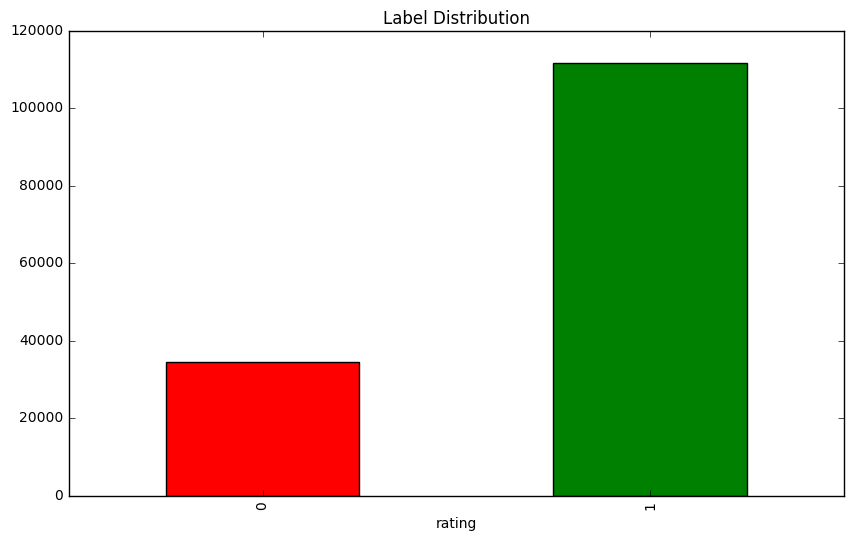

In [46]:
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [47]:
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['rating']== '0']
    pos = reviews.loc[Summaries['rating']== '1']
    return [pos,neg]
    

In [48]:
[pos,neg] = splitPosNeg(reviews)

In [49]:
#preprocessing steps

#stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

#filtered_words = [word for word in word_list if word not in stopwords.words('english')]

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    #print(line)
    stops = stopwords.words('english')
    stops.remove('not')
    stops.remove('no')
    line = [word for word in line if word not in stops]
    #print("After removing stop words")
    #print(line)
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [50]:
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [51]:
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))
#print(labels)

In [52]:
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)
#print(t)

In [53]:
word_features = nltk.FreqDist(t)
print(len(word_features))

55558


In [54]:
topwords = [fpair[0] for fpair in list(word_features.most_common(5000))]
print(word_features.most_common(25))

[('not', 80912), ('baby', 70749), ('one', 66194), ('love', 52997), ('great', 47666), ('like', 45664), ('would', 45661), ('use', 42480), ('seat', 39416), ('get', 38306), ('month', 34560), ('time', 33391), ('little', 33166), ('easy', 32862), ('old', 31945), ('well', 30745), ('product', 30585), ('really', 28026), ('also', 27756), ('son', 26691), ('bought', 25451), ('work', 25281), ('no', 24775), ('good', 23749), ('much', 23651)]


In [55]:
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])
#print(word_his)

In [56]:
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [57]:
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [58]:
ctr_features = vec.transform(data)
tr_features = tf_vec.transform(ctr_features)

In [59]:
tr_features.shape

(145927, 4973)

In [60]:
clf =  MLPClassifier()
clf = clf.fit(tr_features, labels)
tfPredication = clf.predict(tr_features)
tfAccuracy = metrics.accuracy_score(tfPredication,labels)
print(tfAccuracy * 100)

99.9924619844


In [61]:
## Testing Dataset.
reviews = pd.read_csv('amazon_baby_test.csv')
reviews.shape
reviews = reviews.dropna()
reviews.shape
#print(reviews.head(25))

scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: '1' if x > 3 else '0')
#print(reviews.head(25))


scores.mean()

4.11421674849823

In [62]:
reviews.groupby('rating')['review'].count()

rating
0     8668
1    27789
Name: review, dtype: int64

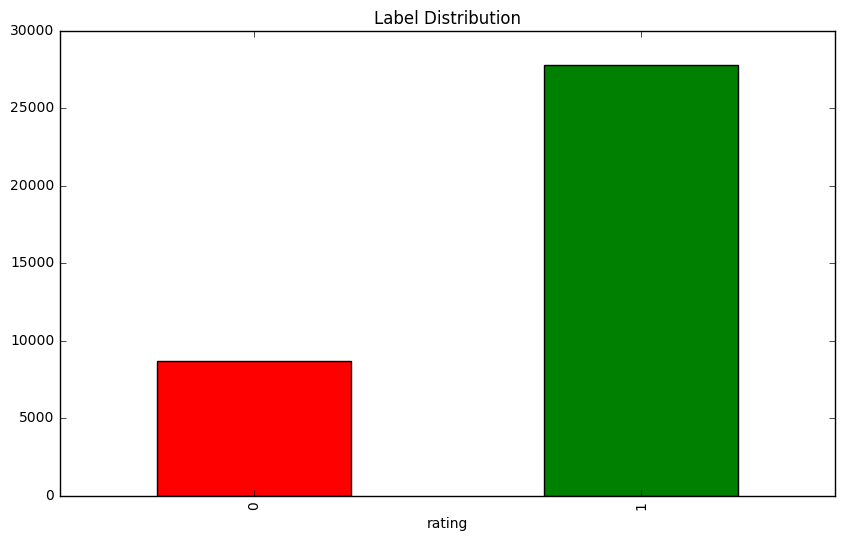

In [63]:
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [64]:
[pos,neg] = splitPosNeg(reviews)

In [65]:
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [66]:
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))
#print(labels)

In [67]:
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)
#print(t)

In [68]:
word_features = nltk.FreqDist(t)
print(len(word_features))

27828


In [69]:
topwords = [fpair[0] for fpair in list(word_features.most_common(5002))]
print(word_features.most_common(25))

[('not', 20502), ('baby', 17687), ('one', 16201), ('love', 13132), ('great', 11756), ('would', 11417), ('like', 11267), ('seat', 10442), ('use', 10437), ('get', 9549), ('month', 8510), ('little', 8383), ('time', 8267), ('easy', 8255), ('old', 7899), ('well', 7800), ('product', 7426), ('really', 6923), ('also', 6870), ('son', 6468), ('work', 6259), ('bought', 6186), ('no', 6051), ('good', 5950), ('much', 5944)]


In [70]:
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])
#print(word_his)

In [71]:
len(topwords)

5002

In [72]:
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [73]:
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [74]:
cte_features = vec.transform(data)
te_features = tf_vec.transform(cte_features)

In [75]:
te_features.shape

(36457, 4973)

In [80]:
tePredication = clf.predict(te_features)
teAccuracy = metrics.accuracy_score(tePredication,labels)
print(teAccuracy*100)

60.188715473


In [79]:
print(metrics.classification_report(labels, tePredication))

             precision    recall  f1-score   support

          0       0.21      0.25      0.23      8668
          1       0.75      0.71      0.73     27789

avg / total       0.62      0.60      0.61     36457

